<a href="https://colab.research.google.com/github/shirlszhao/Voter-Registration/blob/main/Midterm_Project_325_Spring_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
print(voters)

    Jurisdiction  Year Month  New registered voters
0        Arizona  2016   Jan                  25852
1        Arizona  2016   Feb                  51155
2        Arizona  2016   Mar                  48614
3        Arizona  2016   Apr                  30668
4        Arizona  2020   Jan                  33229
..           ...   ...   ...                    ...
101     Virginia  2020   Jan                  25934
102     Virginia  2020   Feb                  29507
103     Virginia  2020   Mar                  31492
104     Virginia  2020   Apr                   5467
105     Virginia  2020   May                   8239

[106 rows x 4 columns]


##Introduction (10 points)
You've been hired to work with a government organization interested information about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



The purpose of this project is to analyze voter registration trends in the United States. The dataset focuses on both national and state patterns. By analyzing fluctuations in new voter registrations over time, we can attempt to identify the factors that influence voter engagement. Some factors may include election cycles, policy changes, and major political events.

The goal is to provide an insight on how voter registration numbers change over time and across the different states.

It is important for someone to read this notebook because it provides a structure to understand voter registration trends. Readers will have a better understanding on how the numbers shifted over time.

Research Questions:
1. How do new voter registrations in the U.S. fluctuate during presidential election years compared to non-election years?
2. How did voter registration numbers in Arizona change between the 2016 and 2020 election cycles? What factors may have influenced these trends?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [ ]:
print(voters.head())

  Jurisdiction  Year Month  New registered voters
0      Arizona  2016   Jan                  25852
1      Arizona  2016   Feb                  51155
2      Arizona  2016   Mar                  48614
3      Arizona  2016   Apr                  30668
4      Arizona  2020   Jan                  33229


Check for any missing data data. (1 point)

In [ ]:
missing = voters.isnull()
total = missing.sum()
print(total)

Jurisdiction             0
Year                     0
Month                    0
New registered voters    0
dtype: int64


Check your data types. (1 point)

In [ ]:
print(voters.dtypes)

Jurisdiction             object
Year                      int64
Month                    object
New registered voters     int64
dtype: object


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [ ]:
voters.rename(columns = {"Jurisdiction": "NAME", "New registered voters": "registered_voters"}, inplace = True)
print(voters.columns)

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')


Explain any potential limitations to your data (2 points)

One potential limitation is that the dataset only includes data from specific U.S. states, but not all states. This can be geographic bias, since some states might have higher/lower registration rates due to their local policies or demographic differences. Another potential limit is the years analyzed for voter registration. It does not include any years between or beyond 2020 (post-covid). It's imperative to see the factors of voter trends based on the universal event that happened in 2020 and its aftermath.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
maximum = voters.loc[voters["registered_voters"].idxmax()]
state = maximum["NAME"]
month = maximum["Month"]
year = maximum["Year"]
new_registered = maximum["registered_voters"]

print(f"The state with the highest amount of new voter registration is {state} in {month} with a grand total of {new_registered}.")

The state with the highest amount of new voter registration is California in Feb with a grand total of 238281.


What is the average voter registration? (1 points)

In [ ]:
average = voters["registered_voters"].mean()
print(average)

48223.46226415094


Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:

  high_voters = voters[voters["registered_voters"] > average]
times = len(high_voters)
print(f"The # of times voter registration was above average is {times}.")

The # of times voter registration was above average is 36.


How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:
state_times = high_voters.groupby("NAME")["registered_voters"].count()
print(state_times)

NAME
Arizona           3
California        7
Florida           7
Georgia           1
Illinois          4
North Carolina    6
Texas             8
Name: registered_voters, dtype: int64


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [ ]:
average_registration = voters.groupby("NAME")["registered_voters"].mean()
top_three = average_registration.sort_values(ascending = False).head(3)
print(top_three)

NAME
California    144545.375
Texas         114610.100
Florida        65868.125
Name: registered_voters, dtype: float64


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

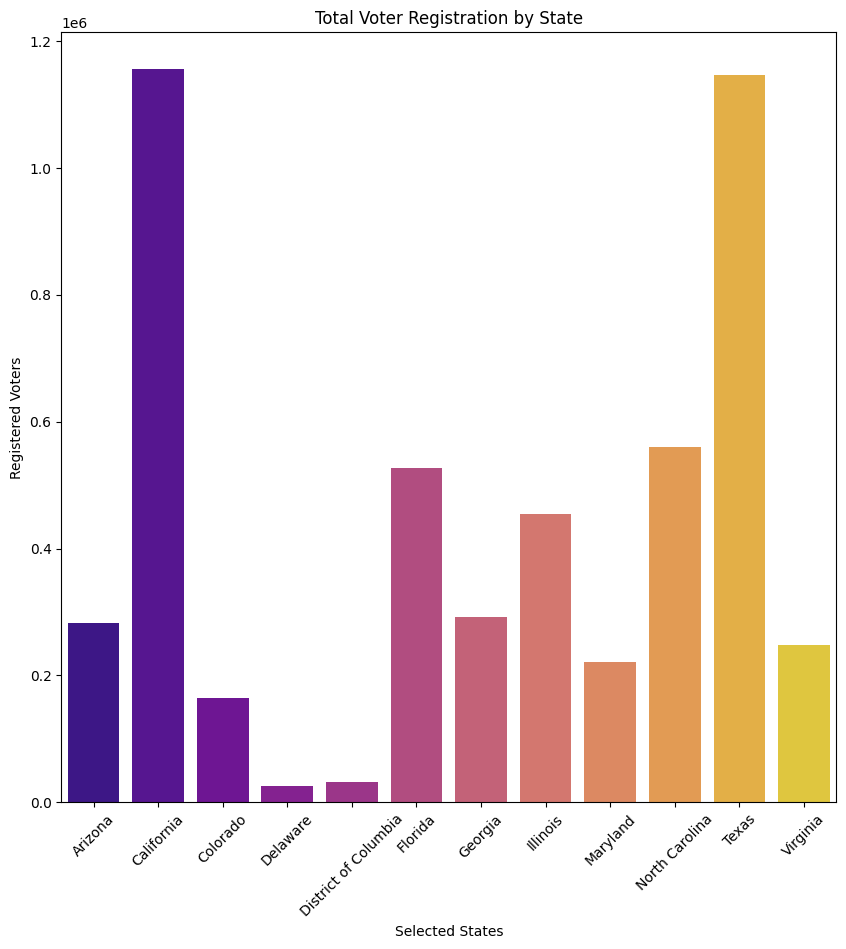

In [ ]:
the_state_registration = voters.groupby("NAME")["registered_voters"].sum().reset_index()

plt.figure(figsize=(10,10))
sns.barplot(x="NAME", y="registered_voters", data = the_state_registration, palette = "plasma", hue = "NAME")
plt.xticks(rotation = 45)
plt.xlabel("Selected States")
plt.ylabel("Registered Voters")
plt.title("Total Voter Registration by State")
plt.show()

The plot shows a great variation of total voter registration across the states. California and Texas are leading in overall registration numbers compared to the other states. Definitely need to figure out and understand the factors that has contributed to these differences. For example, it would be a lack of education or historical voting patterns.


Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

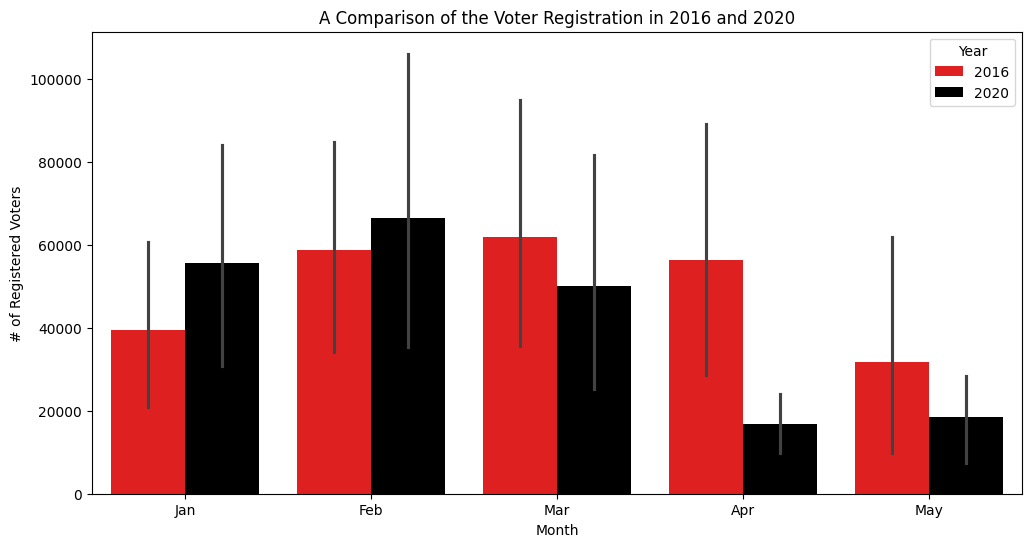

In [ ]:
voters_by_years = voters[voters["Year"].isin([2016, 2020])]
plt.figure(figsize=(12,6))
sns.barplot(x="Month", y="registered_voters", hue="Year", data = voters_by_years, palette = "flag")
plt.xlabel("Month")
plt.ylabel("# of Registered Voters")
plt.title("A Comparison of the Voter Registration in 2016 and 2020")
plt.show()

The bar plot compares voter registration in 2016 and 2020 across different months. It seems that there is definitely some sort of factor that shifts the number of voter registration pretty drastically. February is the highest month for 2020, but March is the highest month for 2016. There is also a significant decline in April, comparing 2016 to 2020.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

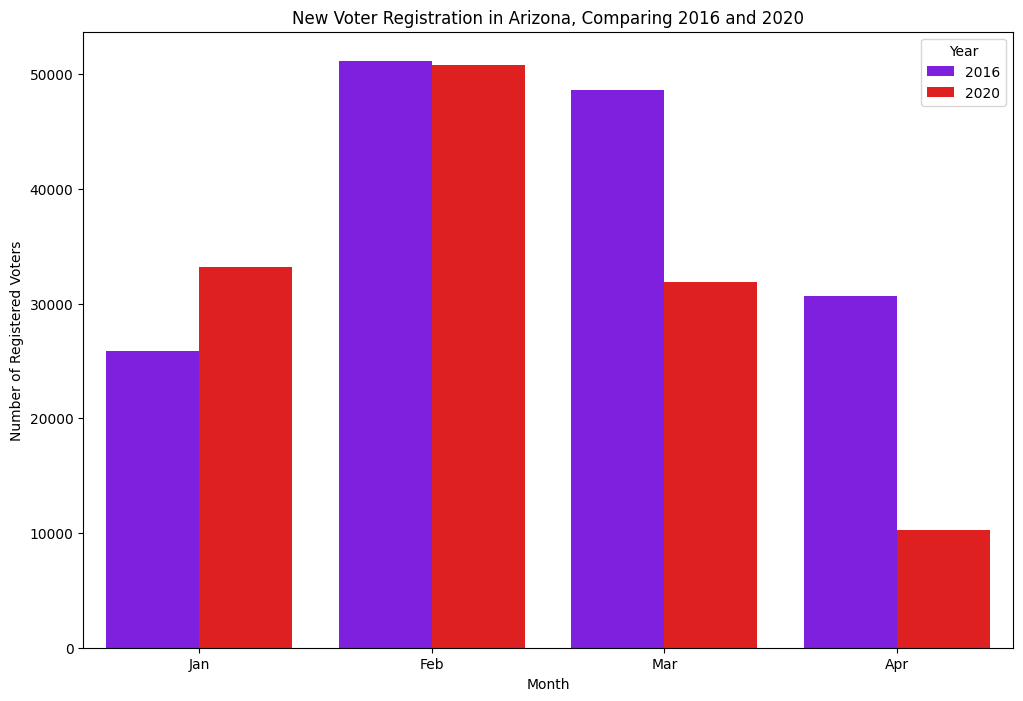

In [ ]:
arizona_voters = voters[voters["NAME"] == "Arizona"]
arizona_voters_year = arizona_voters.groupby("Year")["registered_voters"].sum().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x = "Month", y = "registered_voters", hue = "Year", data = arizona_voters, palette = "rainbow")
plt.xlabel("Month")
plt.ylabel("Number of Registered Voters")
plt.title("New Voter Registration in Arizona, Comparing 2016 and 2020")
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

!git clone https://github.com/SFord87/325-Datasets
shapefile = "/content/325-Datasets/cb_2018_us_state_500k.shp"
states = gpd.read_file(shapefile)
states.head()

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 10.31 MiB/s, done.
Resolving deltas: 100% (13/13), done.


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


Set our continental US bounding box to us for the next questions. (2 points)

In [ ]:
continental = [-125, 24, -66, 50]
us_states = states.cx[continental[0]:continental[2], continental[1]:continental[3]]
print(us_states.head())

  STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00256 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.6432 38.16909, -82.643 38.16956,...  


Create a dataframe that shows the average voter registration per state. (2 points)

In [ ]:
average_registration_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()
print(average_registration_state)

                    NAME  registered_voters
0                Arizona          35311.500
1             California         144545.375
2               Colorado          20527.500
3               Delaware           3166.375
4   District of Columbia           3248.400
5                Florida          65868.125
6                Georgia          36604.125
7               Illinois          56840.375
8               Maryland          22133.500
9         North Carolina          56040.800
10                 Texas         114610.100
11              Virginia          24845.200


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [ ]:
merged = pd.merge(us_states, average_registration_state, on = "NAME", how = "inner")
print(merged)

   STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0       37  01027616  0400000US37    37     NC        North Carolina   00   
1       51  01779803  0400000US51    51     VA              Virginia   00   
2       12  00294478  0400000US12    12     FL               Florida   00   
3       48  01779801  0400000US48    48     TX                 Texas   00   
4       06  01779778  0400000US06    06     CA            California   00   
5       13  01705317  0400000US13    13     GA               Georgia   00   
6       08  01779779  0400000US08    08     CO              Colorado   00   
7       17  01779784  0400000US17    17     IL              Illinois   00   
8       04  01779777  0400000US04    04     AZ               Arizona   00   
9       11  01702382  0400000US11    11     DC  District of Columbia   00   
10      24  01714934  0400000US24    24     MD              Maryland   00   
11      10  01779781  0400000US10    10     DE              Delaware   00   

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

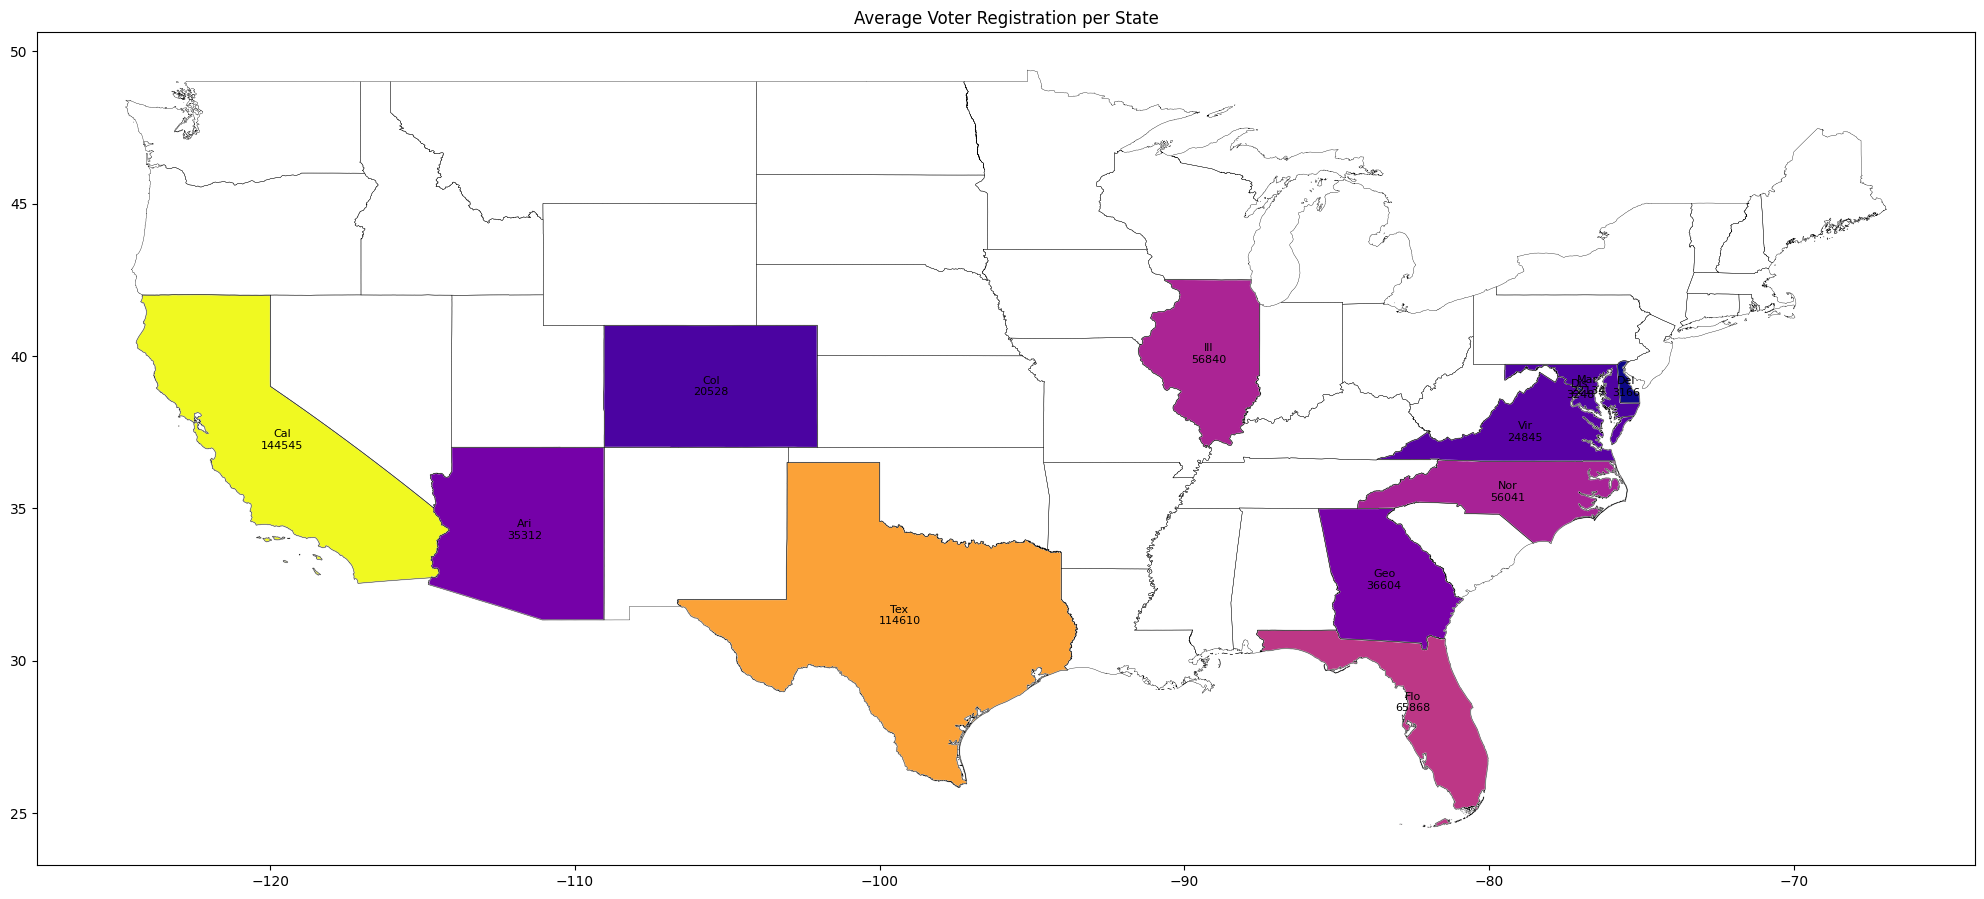

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
us_states.boundary.plot(ax=ax, color="black", linewidth=0.25)
merged.plot(column="registered_voters", cmap="plasma", linewidths=0.8, ax=ax, edgecolor="0.8")
for x, y, label, voters in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged["NAME"], merged["registered_voters"]):
    ax.text(x, y, f"{label[:3]}\n{voters:.0f}", fontsize=8, ha="center", va="center")
ax.set_title("Average Voter Registration per State")
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentences.


Insights: The voter registration data reveals a significant variation in trends across the states and over time. The visualization of total voter registration by state was able to showcase the variation in their overall numbers. It suggests potential factors such as demographics and voting engagement. Comparing 2016 and 2020 showed the fluctuations in monthly registrations. Examining Arizona showed us more localized trends. The spatial analysis was able to tell us the geographical distribution amongst average voter registration and provided a visual representation of diferences in regions.

Suggestions:  One suggestion is to include additional demographic data such as age, income levels, and education. This would allow us a analysis of factors influencing registration trends.

Possible next steps: We can begin to study their demographic factors based on the suggestion provided. Then, we can come to a better conclusion on this analysis.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Shirley Zhao